In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import gender_guesser.detector as gender


# Load and merge data

In [2]:
# data from:
# https://www.imdb.com/interfaces/


fpath = "./title.crew.tsv/data.tsv"
df_crew = pd.read_csv(fpath, sep='\t')

fpath = "./title.ratings.tsv/data.tsv"
df_ratings = pd.read_csv(fpath, sep='\t')

fpath = "./name.basics.tsv/data.tsv"
df_name = pd.read_csv(fpath, sep='\t')

fpath = "./title.basics.tsv/data.tsv"
df_title = pd.read_csv(fpath, sep='\t')

C:\Users\Cancellierie\AppData\Local\Continuum\anaconda3\envs\imdb\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print('len artist names:', len(df_name)   )
print('len ratings file:', len(df_ratings))
print('len crew file   :', len(df_crew)   )
print('len movie title :', len(df_title)  )
df_name.head()
df_ratings.head()
df_crew.head()
df_title.head()

len artist names: 9604401
len ratings file: 976773
len crew file   : 6193756
len movie title : 6193756


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
df_merged = pd.merge(df_ratings, df_crew[ ['tconst', 'directors'            ]], left_on='tconst'   , right_on='tconst')
df_merged = pd.merge(df_merged , df_title[['tconst','primaryTitle', 'genres']], left_on='tconst'   , right_on='tconst')
df_merged = pd.merge(df_merged , df_name[ ['nconst','primaryName'           ]], left_on='directors', right_on='nconst')
df_merged = df_merged.rename(columns={'primaryName': "DirectorName"}).drop(['nconst'], axis=1)
print('# of Titles with Ratings and Crew and Artist NAme:',len(df_merged))
df_merged.head()

# of Titles with Ratings and Crew and Artist NAme: 723690


,tconst,averageRating,numVotes,directors,primaryTitle,genres,DirectorName
0,tt0000001,5.6,1538,nm0005690,Carmencita,"Documentary,Short",William K.L. Dickson
1,tt0000005,6.1,1909,nm0005690,Blacksmith Scene,"Comedy,Short",William K.L. Dickson
2,tt0000006,5.2,102,nm0005690,Chinese Opium Den,Short,William K.L. Dickson
3,tt0000008,5.4,1643,nm0005690,Edison Kinetoscopic Record of a Sneeze,"Documentary,Short",William K.L. Dickson
4,tt0000036,4.5,449,nm0005690,Awakening of Rip,"Drama,Short",William K.L. Dickson


# Define gender

In [5]:
d = gender.Detector()
def get_gender_from_name(x):
    return d.get_gender(x)

df_merged['DirectorFirstName'] = df_merged['DirectorName'].str.split().str[0]
df_merged['DirectorGender']    = df_merged['DirectorFirstName'].apply(get_gender_from_name)
print('# Different names:', df_merged['DirectorName'].nunique())
print('# Unknown gender :', df_merged[df_merged['DirectorGender'] == 'unknown']['DirectorName'].nunique())
print('Names cathegories:\n', df_merged['DirectorGender'].value_counts())
df_merged.head()

# Different names: 152330
# Unknown gender : 20843
Names cathegories:
 male             536245
unknown           71924
female            66914
mostly_male       30996
mostly_female     10247
andy               7364
Name: DirectorGender, dtype: int64


,tconst,averageRating,numVotes,directors,primaryTitle,genres,DirectorName,DirectorFirstName,DirectorGender
0,tt0000001,5.6,1538,nm0005690,Carmencita,"Documentary,Short",William K.L. Dickson,William,male
1,tt0000005,6.1,1909,nm0005690,Blacksmith Scene,"Comedy,Short",William K.L. Dickson,William,male
2,tt0000006,5.2,102,nm0005690,Chinese Opium Den,Short,William K.L. Dickson,William,male
3,tt0000008,5.4,1643,nm0005690,Edison Kinetoscopic Record of a Sneeze,"Documentary,Short",William K.L. Dickson,William,male
4,tt0000036,4.5,449,nm0005690,Awakening of Rip,"Drama,Short",William K.L. Dickson,William,male


# Compare Gender vs Ratings

In [10]:
gender1 = 'male'
gender2 = 'female'


In [11]:
aux    = df_merged.copy()
dfg1   = aux[aux['DirectorGender'] == gender1].copy()
dfg2   = aux[aux['DirectorGender'] == gender2].copy()


In [12]:
delta_av     = 0.5
bins_average = np.arange(0,10+delta_av,delta_av)
val_av1, _   = np.histogram(dfg1['averageRating'], bins=bins_average)
val_av2, _   = np.histogram(dfg2['averageRating'], bins=bins_average)

delta_nv     = 2.0
bins_n_votes = np.arange(0,50+delta_nv,delta_nv)
val_nv1, _   = np.histogram(dfg1['numVotes'], bins=bins_n_votes)
val_nv2, _   = np.histogram(dfg2['numVotes'], bins=bins_n_votes)


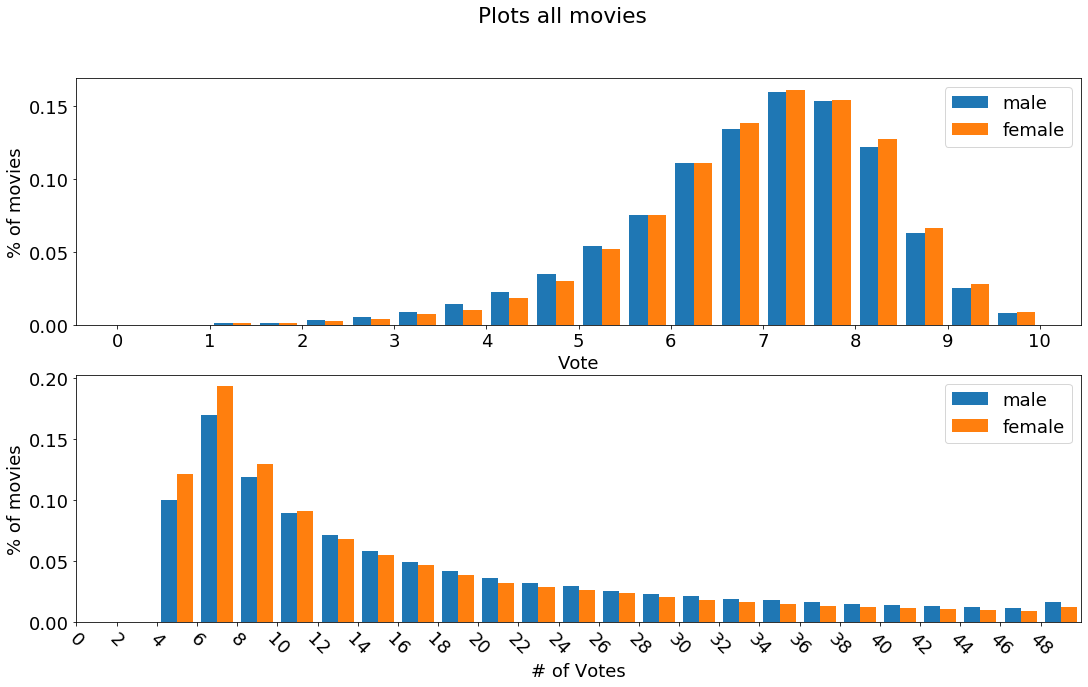

In [13]:
fig, axs = plt.subplots(2,figsize=(18,10))
fig.suptitle('Plots all movies')
plt.rcParams.update({'font.size': 18})

axs[0].bar(bins_average[1:]-0.7*delta_av, val_av1/np.sum(val_av1), width=0.4*delta_av,label=gender1)
axs[0].bar(bins_average[1:]-0.3*delta_av, val_av2/np.sum(val_av2), width=0.4*delta_av,label=gender2)
axs[0].set_xticks(np.arange(0,11))
axs[0].set_ylabel('% of movies')
axs[0].set_xlabel('Vote')
axs[0].legend()

axs[1].bar(bins_n_votes[1:]-0.7*delta_nv, val_nv1/np.sum(val_nv1), width=0.4*delta_nv,label=gender1)
axs[1].bar(bins_n_votes[1:]-0.3*delta_nv, val_nv2/np.sum(val_nv2), width=0.4*delta_nv,label=gender2)
axs[1].set_xlim(0,50)
axs[1].set_xticks(np.arange(0,50,2))
axs[1].set_xticklabels(np.arange(0,50,2),rotation=-45)
axs[1].set_ylabel('% of movies')
axs[1].set_xlabel('# of Votes')
axs[1].legend()
plt.show()

# Analysis by genres

In [10]:
a = df_merged['genres'].unique()
newa = []
for aa in a:
    for aaa in aa.split(','):
        newa.append(aaa)
genres_list = list(set(newa))
genres_list.sort()
genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western',
 '\\N']

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df_hot_encoded                = df_merged.copy()
df_hot_encoded['genres_list'] = df_hot_encoded['genres'].apply(lambda x: list(x.split(',')))
df_hot_encoded                = df_hot_encoded.join(pd.DataFrame(mlb.fit_transform(df_hot_encoded.pop('genres_list')),
                                                    columns=mlb.classes_, index=df_hot_encoded.index))
unique_genres                 = df_hot_encoded.columns[-29:]
print(unique_genres)
df_hot_encoded.head()

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western', '\N'],
      dtype='object')


,tconst,averageRating,numVotes,directors,primaryTitle,genres,DirectorName,DirectorFirstName,DirectorGender,Action,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
0,tt0000001,5.6,1538,nm0005690,Carmencita,"Documentary,Short",William K.L. Dickson,William,male,0,...,0,0,0,1,0,0,0,0,0,0
1,tt0000005,6.1,1909,nm0005690,Blacksmith Scene,"Comedy,Short",William K.L. Dickson,William,male,0,...,0,0,0,1,0,0,0,0,0,0
2,tt0000006,5.2,102,nm0005690,Chinese Opium Den,Short,William K.L. Dickson,William,male,0,...,0,0,0,1,0,0,0,0,0,0
3,tt0000008,5.4,1643,nm0005690,Edison Kinetoscopic Record of a Sneeze,"Documentary,Short",William K.L. Dickson,William,male,0,...,0,0,0,1,0,0,0,0,0,0
4,tt0000036,4.5,449,nm0005690,Awakening of Rip,"Drama,Short",William K.L. Dickson,William,male,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
ii = 1

aux    = df_hot_encoded[df_hot_encoded[unique_genres[ii]] == 1].copy()
dfg1   = aux[aux['DirectorGender'] == gender1].copy()
dfg2   = aux[aux['DirectorGender'] == gender2].copy()

print(unique_genres[ii])
aux.head()

Action


,tconst,averageRating,numVotes,directors,primaryTitle,genres,DirectorName,DirectorFirstName,DirectorGender,Action,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
82,tt0308254,4.8,9,nm0005690,Fencing Contest from 'The Three Musketeers',"Action,Drama,Short",William K.L. Dickson,William,male,1,...,0,0,0,1,0,0,0,0,0,0
100,tt1770693,5.1,18,nm0005690,Lasso Thrower,"Action,Short,Western",William K.L. Dickson,William,male,1,...,0,0,0,1,0,0,0,0,1,0
101,tt1770702,4.8,17,nm0005690,Mexican Knife Duel,"Action,Short",William K.L. Dickson,William,male,1,...,0,0,0,1,0,0,0,0,0,0
156,tt0000041,6.6,1298,nm0525910,Bataille de neige,"Action,Comedy,Documentary",Louis Lumière,Louis,male,1,...,0,0,0,0,0,0,0,0,0,0
225,tt1666737,5.4,154,nm0525910,Bataille de femmes,"Action,Comedy,Family",Louis Lumière,Louis,male,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
delta_av     = 1.0
bins_average = np.arange(0,10+delta_av,delta_av)
val_av1, _   = np.histogram(dfg1['averageRating'], bins=bins_average)
val_av2, _   = np.histogram(dfg2['averageRating'], bins=bins_average)

delta_nv     = 2.0
bins_n_votes = np.arange(0,50+delta_nv,delta_nv)
val_nv1, _   = np.histogram(dfg1['numVotes'], bins=bins_n_votes)
val_nv2, _   = np.histogram(dfg2['numVotes'], bins=bins_n_votes)


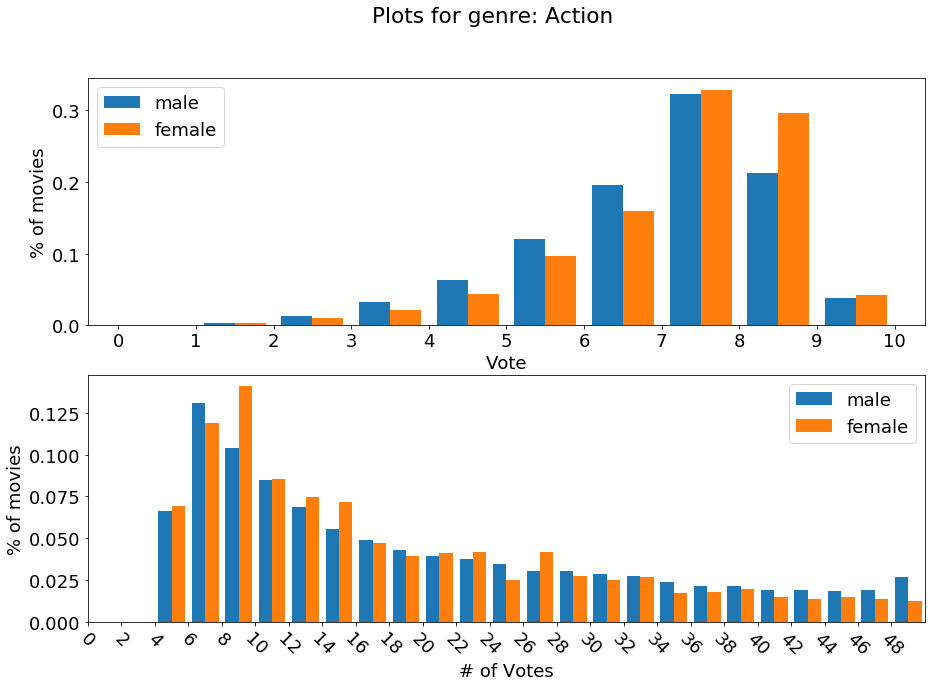

In [85]:
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Plots for genre: '+genres_list[ii])

axs[0].bar(bins_average[1:]-0.7*delta_av, val_av1/np.sum(val_av1), width=0.4*delta_av,label=gender1)
axs[0].bar(bins_average[1:]-0.3*delta_av, val_av2/np.sum(val_av2), width=0.4*delta_av,label=gender2)
axs[0].set_xticks(np.arange(0,11))
axs[0].set_ylabel('% of movies')
axs[0].set_xlabel('Vote')
axs[0].legend()

axs[1].bar(bins_n_votes[1:]-0.7*delta_nv, val_nv1/np.sum(val_nv1), width=0.4*delta_nv,label=gender1)
axs[1].bar(bins_n_votes[1:]-0.3*delta_nv, val_nv2/np.sum(val_nv2), width=0.4*delta_nv,label=gender2)
axs[1].set_xlim(0,50)
axs[1].set_xticks(np.arange(0,50,2))
axs[1].set_xticklabels(np.arange(0,50,2),rotation=-45)
axs[1].set_ylabel('% of movies')
axs[1].set_xlabel('# of Votes')
axs[1].legend()
plt.show()

# Downsampling the marjority class

In [56]:
from sklearn.utils import resample


df_majority = df_hot_encoded[df_hot_encoded['DirectorGender'] == 'male']
df_minority = df_hot_encoded[df_hot_encoded['DirectorGender'] == 'female']

# Upsample   minority class
# Downsample majority class
df_minority_upsampled   = resample(df_minority, 
                                   replace      = True,   # sample with replacement
                                   n_samples    = 536245, # to match majority class
                                   random_state = 42)     # reproducible results
df_majority_downsampled = resample(df_majority, 
                                   replace      = False, # sample with replacement
                                   n_samples    = 66914, # to match majority class
                                   random_state = 42)    # reproducible results

# Combine majority class with   upsampled minority class
# Combine minority class with downsampled majority class
df_upsampled   = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Display class counts
print(df_hot_encoded['DirectorGender'].value_counts())
print(df_upsampled[  'DirectorGender'].value_counts())
print(df_downsampled['DirectorGender'].value_counts())

male             536245
unknown           71924
female            66914
mostly_male       30996
mostly_female     10247
andy               7364
Name: DirectorGender, dtype: int64
female    536245
male      536245
Name: DirectorGender, dtype: int64
female    66914
male      66914
Name: DirectorGender, dtype: int64


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cols = ['averageRating', 'numVotes'] + list(unique_genres)
print('List of features:',cols)

train, test = train_test_split(df_downsampled, test_size=0.2, random_state=10)
#train, test = train_test_split(df_upsampled, test_size=0.2, random_state=10)
Xtrain = train[cols]
Xtest  = test[ cols]
ytrain = train['DirectorGender']
ytest  = test[ 'DirectorGender']

for depth in np.arange(15,30).astype(int):
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    #clf = RandomForestClassifier(max_depth=6, random_state=0)
    clf.fit(Xtrain, ytrain)
    predicted = clf.predict(Xtest)
#    print('Depth:', depth, 'Accuracy:', np.sum(predicted == ytest.values)/len(predicted))
    print('Max_depth = %.d, Accuracy: %.2f'%(depth, 100*np.sum(predicted == ytest.values)/len(predicted)))

List of features: ['averageRating', 'numVotes', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', '\\N']
Depth: 15, Accuracy: 62.51
Depth: 16, Accuracy: 62.69
Depth: 17, Accuracy: 62.82
Depth: 18, Accuracy: 62.81
Depth: 19, Accuracy: 63.02
Depth: 20, Accuracy: 63.03
Depth: 21, Accuracy: 63.16
Depth: 22, Accuracy: 63.04
Depth: 23, Accuracy: 63.03
Depth: 24, Accuracy: 62.97
Depth: 25, Accuracy: 62.99
Depth: 26, Accuracy: 62.92
Depth: 27, Accuracy: 62.84
Depth: 28, Accuracy: 62.65
Depth: 29, Accuracy: 62.34
